In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import seaborn as sns
sns.set()

In [118]:
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [119]:
df.shape

(10000, 6)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [121]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [122]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [123]:
df['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

In [124]:
data = df.copy()

In [125]:
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'No' : 0, 'Yes' : 1})

In [126]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [127]:
x = data.drop(columns = ['Performance Index'], axis = 1)
y = data['Performance Index']

In [128]:
reg = LinearRegression()

In [129]:
reg.fit(x, y)

LinearRegression()

In [130]:
reg.score(x, y)

0.9887523323780958

In [131]:
reg.coef_

array([2.85298205, 1.01843419, 0.61289758, 0.48055975, 0.19380214])

In [132]:
reg.intercept_

-34.0755880919139

In [133]:
f_regression(x, y)

(array([1.62318122e+03, 5.15551100e+04, 6.01714644e+00, 2.31907531e+01,
        1.87528447e+01]),
 array([0.00000000e+00, 0.00000000e+00, 1.41844916e-02, 1.48853696e-06,
        1.50251931e-05]))

In [135]:
p_values = f_regression(x, y)[1]
p_values

array([0.00000000e+00, 0.00000000e+00, 1.41844916e-02, 1.48853696e-06,
       1.50251931e-05])

In [136]:
p_values.round(3)

array([0.   , 0.   , 0.014, 0.   , 0.   ])

In [137]:
r2 = reg.score(x, y)
n = x.shape[0]
p = x.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.9887467051679587

In [138]:
reg2 = LinearRegression()

In [139]:
x.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [140]:
x_n = data[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]

In [141]:
reg2.fit(x_n, y)

LinearRegression()

In [142]:
reg2.score(x_n, y)

0.9884981216772581

In [143]:
r2_n = reg2.score(x_n, y)
n = x_n.shape[0]
p = x_n.shape[1]
adjusted_r2_n = 1 - (1 - r2_n) * (n - 1) / (n - p - 1)
adjusted_r2_n

0.9884935186244026

In [144]:
reg2.coef_

array([2.85342921, 1.01858354, 0.47633298, 0.1951983 ])

In [145]:
reg2.intercept_

-33.763726090795075

In [146]:
f_regression(x_n, y)

(array([1.62318122e+03, 5.15551100e+04, 2.31907531e+01, 1.87528447e+01]),
 array([0.00000000e+00, 0.00000000e+00, 1.48853696e-06, 1.50251931e-05]))

In [147]:
p_values2 = f_regression(x_n, y)[1]
p_values2_r = p_values2.round(3)

In [148]:
p_values2_r

array([0., 0., 0., 0.])

In [151]:
inf = pd.DataFrame(data = x_n.columns, columns = ['Features'])

In [152]:
inf

,Features
0,Hours Studied
1,Previous Scores
2,Sleep Hours
3,Sample Question Papers Practiced


In [153]:
inf['Coefficients'] = reg2.coef_
inf['P-Values'] = p_values2_r

In [154]:
inf

,Features,Coefficients,P-Values
0,Hours Studied,2.853429,0.0
1,Previous Scores,1.018584,0.0
2,Sleep Hours,0.476333,0.0
3,Sample Question Papers Practiced,0.195198,0.0


In [155]:
reg2.intercept_

-33.763726090795075

In [159]:
yhat = x_n['Hours Studied'] * 2.85 + x_n['Previous Scores'] * 1.01 + x_n['Sleep Hours'] * 0.47 + \
x_n['Sample Question Papers Practiced'] * 0.19 - 33.76

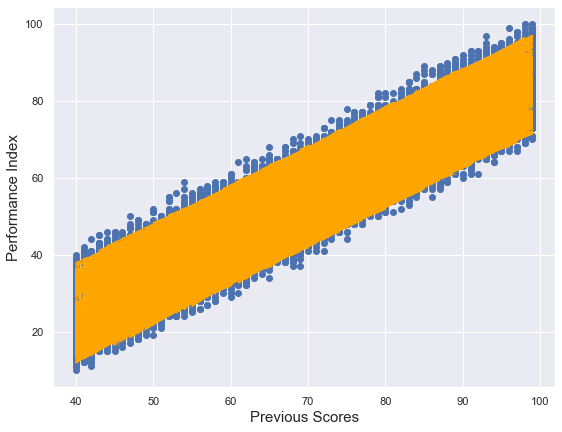

In [163]:
plt.figure(figsize = (9, 7))
plt.scatter(x_n['Previous Scores'], y)
fig = plt.plot(x_n['Previous Scores'], yhat, lw = 1, c = 'orange')
plt.xlabel('Previous Scores', fontsize = 15)
plt.ylabel('Performance Index', fontsize = 15)
plt.show()